3장 단층 신경망

In [1]:
# 예제 3.3 델타 학습법 OR 연산

import numpy as np
np.random.seed(77)

# sigmoid 함수 정의
def sigmoid(net):
    return  1 / (1 + np.exp(-net))

# 뉴런 정의
def neuron(x, w, b):
    net = np.dot(x, w) + b   # 입력 가중합
    return sigmoid(net)

# 학습 데이터 준비
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])   # 입력 데이터
y_train = np.array([[0], [1], [1], [1]])   # 목표치(정답)

# 가중치 초기화
w = np.random.rand(2)   # 균등 분포
b = np.random.rand(1)

print(f"initial weights: {w.round(2)}")
print(f"initial bias: {b.round(2)}")

initial weights: [0.92 0.64]
initial bias: [0.75]


In [2]:
# 델타 학습법을 이용한 신경망 학습
epochs = 5000   # 5,000회 반복
learning_rate = 0.1   # 학습률 0.1

for i in range(epochs):
    loss = 0

    for j in range(4):
        output = neuron(x_train[j], w, b)   # 출력 구함
        error = 0.5 * (y_train[j] - output) ** 2   # 제곱 오차 계산
        w += learning_rate * (y_train[j] - output) * output * \
             (1 - output) * x_train[j]   # 가중치 변경
        b += learning_rate * (y_train[j] - output) * output * \
             (1 - output)   # 바이어스 변경
        loss += error

    if (i+1) % 1000 == 0:
        print(f"Epoch {i+1} \t Error: {loss.round(3)}")   # 오차 출력

print(f"\nfinal weights: {w.round(2)}")
print(f"final bias: {b.round(2)}")

Epoch 1000 	 Error: [0.035]
Epoch 2000 	 Error: [0.016]
Epoch 3000 	 Error: [0.01]
Epoch 4000 	 Error: [0.007]
Epoch 5000 	 Error: [0.006]

final weights: [5.38 5.38]
final bias: [-2.43]


In [3]:
# 검증(예측)
x_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])   # 테스트 데이터
y_test = np.array([[0], [1], [1], [1]])   # 테스트 정답

for i in range(4):
    predict = neuron(x_test[i], w, b)   # 예측

    print(f"x: {x_test[i]}  y: {y_test[i]}  predict: {predict.round(2)}")

x: [0 0]  y: [0]  predict: [0.08]
x: [0 1]  y: [1]  predict: [0.95]
x: [1 0]  y: [1]  predict: [0.95]
x: [1 1]  y: [1]  predict: [1.]


In [4]:
# 예제 3.5 단층 신경망 이진 분류기(OR 연산)

# 셋업
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.optimizers import Adam
import numpy as np

# 학습 데이터 준비
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])   # 학습 데이터
y_train = np.array([[0], [1], [1], [1]])   # 레이블(정답)

# 모델 생성
model = Sequential([
    Input(shape=(2, )),   # 입력 shape 지정
    Dense(1,   # 출력층 뉴런 1개
          activation='sigmoid',   # sigmoid 함수 사용
          kernel_initializer=RandomUniform(seed=77),   # 가중치 초기화
          name='Output_Layer')
])

In [5]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.1),   # 학습률 0.1
              loss='mean_squared_error')   # 손실 함수 MSE 사용

In [6]:
# 모델 학습
model.fit(x_train, y_train, epochs=100)   # 100회 반복

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step - loss: 0.2466
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2126
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1853
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1649
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1506
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1413
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1354
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1317
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1292
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1272
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1253
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.1232
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1209
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1182
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1151
Epoch 16/100
1/1 

In [7]:
# 모델 예측
x_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])   # 테스트 데이터
y_test = np.array([[0], [1], [1], [1]])   # 테스트 정답

model.predict(x_test).round(2)   # 예측

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0.15],
       [0.91],
       [0.91],
       [1.  ]], dtype=float32)

In [8]:
# 학습 후 가중치와 바이어스 확인
weights, bias = model.layers[0].get_weights()

print(f"weights: {weights.round(2)} \n bias: {bias.round(2)}")

weights: [[4.1]
 [4.1]] 
 bias: [-1.77]


In [9]:
# 예제 3.5 다중 출력 단층 신경망 이진 분류(OR 연산)

# 셋업
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam
import numpy as np

# 학습 데이터 준비
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])   # 학습 데이터
y_train = np.array([[1, 0], [0, 1], [0, 1], [0, 1]])   # 출력 원핫 인코딩

# 모델 생성
model = Sequential([
    Input(shape=(2, )),   # 입력 shape 지정
    Dense(2,   # 출력층 뉴런 2개
          activation='softmax',   # softmax 함수 사용
          kernel_initializer=RandomNormal(seed=77),   # 가중치 초기화
          name='Output_Layer')
])

In [10]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.1),   # 학습률 0.1
              loss='binary_crossentropy')   # binary_crossentropy 사용

In [11]:
# 모델 학습
model.fit(x_train, y_train, epochs=100, verbose=0)   # 100회 반복

In [12]:
# 모델 예측
x_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])   # 테스트 데이터
y_test = np.array([[1, 0], [0, 1], [0, 1], [0, 1]])   # 테스트 정답

model.predict(x_test).round(2)   # 예측

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.98, 0.02],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]], dtype=float32)

In [13]:
# 학습 후 가중치와 바이어스 확인
weights, bias = model.layers[0].get_weights()

print(f"weights: {weights.round(2)} \n bias: {bias.round(2)}")

weights: [[-4.85  4.79]
 [-4.83  4.81]] 
 bias: [ 1.92 -1.9 ]


In [14]:
# 예제 3.6 선형 회귀 단층 신경망(텐서플로)

# 셋업
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 데이터셋 준비
np.random.seed(777)
x_train = np.random.uniform(0, 10, 200)   # 0 ~ 10의 균등 분포 랜덤값 200개
y_train = 2 * x_train + 1 + np.random.randn(200)   # 정규 분포 랜덤값 200개

print(x_train.shape, y_train.shape, "\n")   # x_train와 y_train shape 확인
print(f"x_train: {x_train[:3].round(1)}")   # 처음 3개 샘플 확인
print(f"y_train: {y_train[:3].round(1)}")

(200,) (200,) 

x_train: [1.5 3.  0.6]
y_train: [4.2 8.6 2.1]


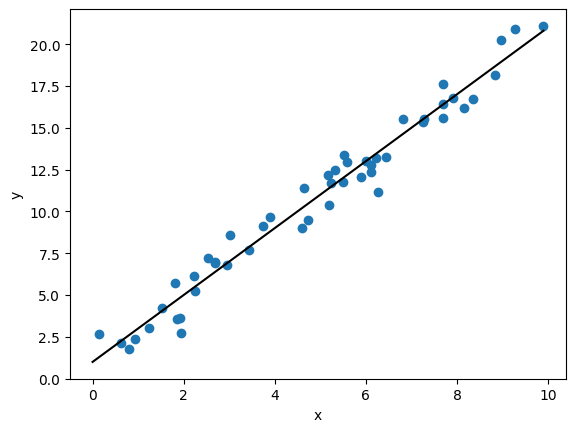

In [16]:
# 데이터 시각화
x = np.arange(0, 10, 0.1)
y = 2 * x + 1

plt.scatter(x_train[:50], y_train[:50])   # 처음 50개 샘플 표현
plt.plot(x, y, color='black')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [17]:
# 학습 데이터/테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train,
    test_size=0.2, # 분할 비율 0.2
    random_state=77)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160,) (160,)
(40,) (40,)


In [18]:
# 모델 생성
model = Sequential(name='linear_regression_model')   # 모델 이름 지정
model.add(Input(shape=(1, )))   # 입력 특징 1개
model.add(Dense(1,   # 출력층 선형 뉴런 1개(활성화 함수 사용하지 않음)
                kernel_initializer=RandomNormal(seed=77),
                name='Output_Layer'))

In [ ]:
# 모델 구조 요약
model.summary()

Model: "linear_regression_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Output_Layer (Dense)                 │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
#  모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.1),
              loss='mse',   # 손실 함수 MSE 사용
              metrics=['mae'])   # 성능 평가 지표 MAE 사용

In [20]:
# 모델 학습
model.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 141.4941 - mae: 10.4592  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.8868 - mae: 7.7465 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.9308 - mae: 4.6246 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6868 - mae: 2.4325  
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6690 - mae: 1.0450 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8809 - mae: 1.1309 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8012 - mae: 1.7242 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6832 - mae: 1.7057 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7957 - mae: 1.4173 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4425 - mae: 0.9902 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1446 - mae: 0.8583 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9847 - mae: 0.8087 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

In [21]:
# 모델 평가
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0759 - mae: 0.8154  


[1.0432977676391602, 0.7980028390884399]

In [22]:
# 모델 예측
x = np.array([1, 3, 5, 7, 9])

model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[ 3.080748],
       [ 7.034075],
       [10.987401],
       [14.940727],
       [18.894054]], dtype=float32)

In [23]:
# 학습 후 가중치와 바이어스 확인
weights, bias = model.layers[0].get_weights()

print(f"weights: {weights.round(2)} \n bias: {bias.round(2)}")

weights: [[1.98]] 
 bias: [1.1]


In [24]:
# 예제 3.6 선형 회귀(파이토치)

# 셋업
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import numpy as np

In [25]:
# 데이터 준비
x_train = init.uniform_(torch.Tensor(200, 1), 0, 10)
y_train = (2 * x_train + 1) + init.normal_(torch.FloatTensor(200, 1))

print(x_train.shape, y_train.shape)

torch.Size([200, 1]) torch.Size([200, 1])


In [26]:
# 모델 생성
model = nn.Sequential(
    nn.Linear(1, 1))   # 입력 특징 1개, 출력 뉴런 1개

In [27]:
# 모델 학습
epochs = 100

loss_fn = nn.L1Loss()   # 손실 함수 MAE 사용
optimizer = optim.Adam(model.parameters(),lr=0.1)

for i in range(epochs):
    optimizer.zero_grad()   # 그레디언트 초기화
    output = model(x_train)   # 출력 구함
    loss = loss_fn(output, y_train)   # 오차 계산

    loss.backward()   # 역전파
    optimizer.step()   # 최적화 수행

    if (i+1) % 10 == 0:
        print(f"epoch: {i + 1} \tloss: {loss}")

epoch: 10 	loss: 9.546213150024414
epoch: 20 	loss: 3.7840306758880615
epoch: 30 	loss: 1.7011027336120605
epoch: 40 	loss: 1.0738860368728638
epoch: 50 	loss: 1.1032053232192993
epoch: 60 	loss: 0.9707825183868408
epoch: 70 	loss: 0.8874338269233704
epoch: 80 	loss: 0.8485828638076782
epoch: 90 	loss: 0.8307046294212341
epoch: 100 	loss: 0.8235400915145874


In [28]:
# 모델 예측
with torch.no_grad():   # 자동 미분하지 않음
    x_test = torch.Tensor([[3], [5], [7], [9]])

    predict = model(x_test)

    print(predict)

tensor([[ 7.2619],
        [11.1830],
        [15.1040],
        [19.0250]])


In [29]:
# 학습 후 최종 가중치 확인
weight, bias = model.parameters()

print(f"weight: {weight} \n \n bias: {bias}")

weight: Parameter containing:
tensor([[1.9605]], requires_grad=True) 
 
 bias: Parameter containing:
tensor([1.3803], requires_grad=True)


In [30]:
# 예제 3.7 로지스틱 회귀

# 셋업
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# 학습 데이터 준비
x_train = np.array([[1, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 1]])   # 학습 데이터
y_train = np.array([[0], [0], [1], [1]])                           # 레이블

# 모델 생성
model = Sequential([
    Input(shape=(3, )),   # 입력 특징 3개
    Dense(1,   # 출력층 뉴런 1개
          activation='sigmoid',   # sigmoid 함수 사용
          kernel_initializer=RandomNormal(seed=77))   # 가중치 초기화

])

In [31]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
                                # 손실 함수 binary_crossentropy 사용
              optimizer=Adam(learning_rate=0.1))   # 학습률 0.1

In [32]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=30, verbose=0)   # 30회 반복

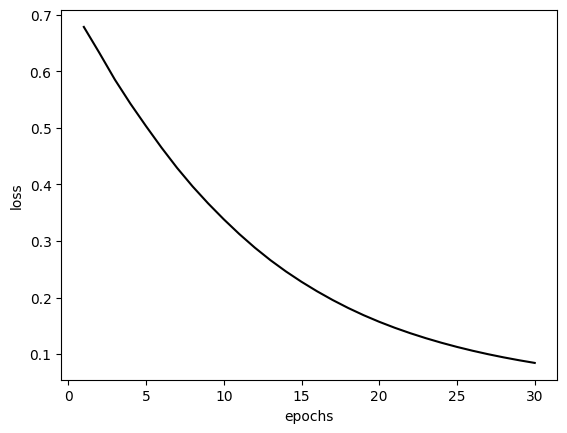

In [33]:
# 학습 결과 시각화
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['loss'], color='black')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

In [34]:
# 모델 예측
x_test = np.array([[1, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 1]])  # 테스트 데이터
y_test = np.array([[0], [0], [1], [1]])   # 테스트 정답

model.predict(x_test).round(2)   # 예측

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.07],
       [0.08],
       [0.92],
       [0.92]], dtype=float32)

In [35]:
# 학습 후 가중치와 바이어스 확인
weights, bias = model.layers[0].get_weights()

print(f"weights: {weights.round(2)} \n bias: {bias.round(2)}")

weights: [[-2.49]
 [-0.02]
 [ 2.48]] 
 bias: [-0.01]
